# CLUSTERING

### Name: Richa Gupta
### Batch: SY AIML B1
### PRN: 22070126087

In [60]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

## Dataset Description

This dataset is made by IBM and offered in the Machine Learning Professional Certificate program offered by Coursera. The dataset has been published by UCI Machine Learning.

Attribute Information:
For each record in the dataset the following is provided:
Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. (Mean, std, mad, max, min, sma, energy, iqr, entropy, arCoeff, correlation)
Triaxial Angular velocity from the gyroscope.
A 561-feature vector with time and frequency domain variables.
The activity label for each datapoint.
An identifier of the subject who carried out the experiment.

There are **10,299 instances** and **562 attributes** in total.

Data type of Features 1-561 : float64

Data type of target variable "Activity" : object

The dataset is based on experiments that have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (**WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING**) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz were captured. The experiments have been video-recorded to label the data manually.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


In [10]:
# Loading the dataset

df = pd.read_csv("Human_Activity_Recognition_Using_Smartphones_Data.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [11]:
# Shape of the data
df.shape

(10299, 562)

## Pre-processing

In [12]:
# Checking for null values
df.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Activity                                0
Length: 562, dtype: int64

There are no null values.

## Exploratory Data Analysis

In [13]:
df.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

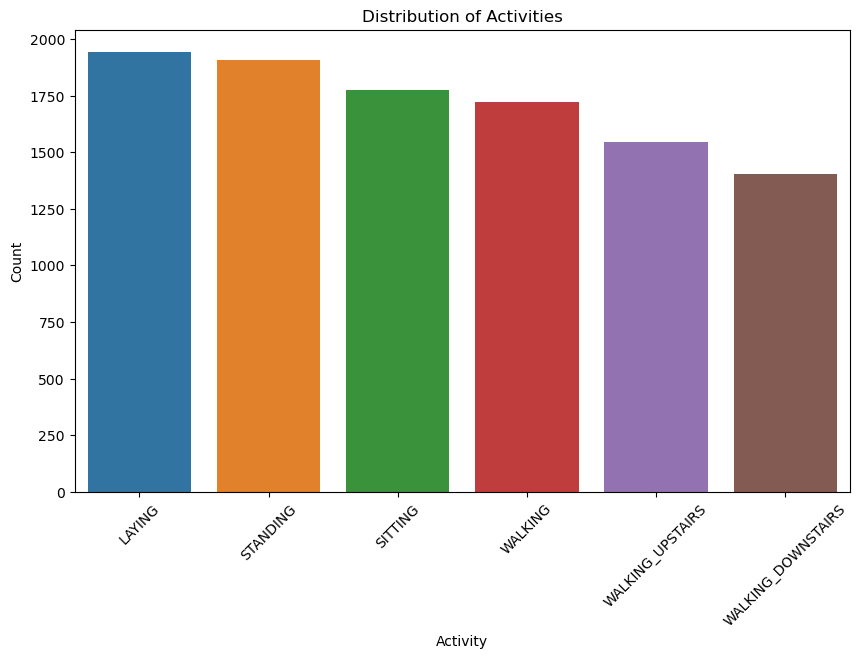

In [14]:
# Histogram plot for all the different activity classes

activity_counts = df['Activity'].value_counts()

# Plotting histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

Since there are too many attributes, hence making a correlation heatmap does not help.

# Implementation

In [15]:
# Splitting the data
X = df.drop('Activity', axis=1)

# Finding the optimal value of K

### Using the Elbow Method

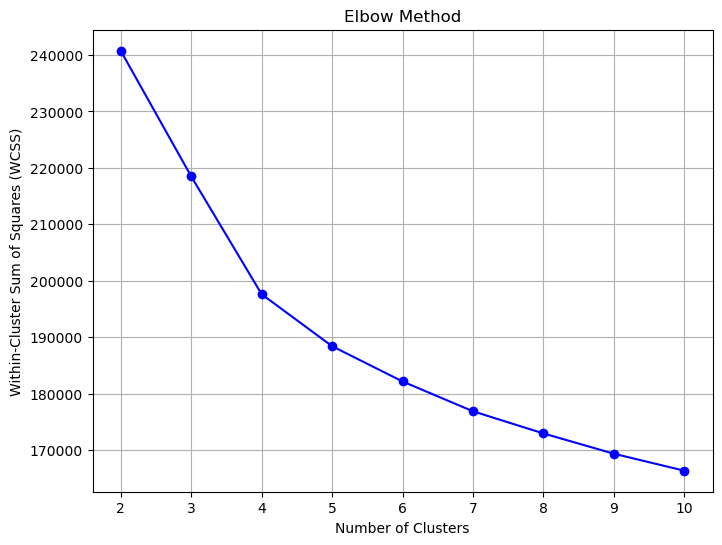

In [22]:
# Plot the elbow method
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.plot(range(2, 11), wcss, marker='o', linestyle='-', color='b')  # Add marker and line style
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')

# Add grid lines
plt.grid(True)

plt.show()

**Given the Elbow Method, we could take 4 as the optimal k-value as after that, the graph sees a continuous declining trend, hence we take k=4**

### Using the silhouette Score Method

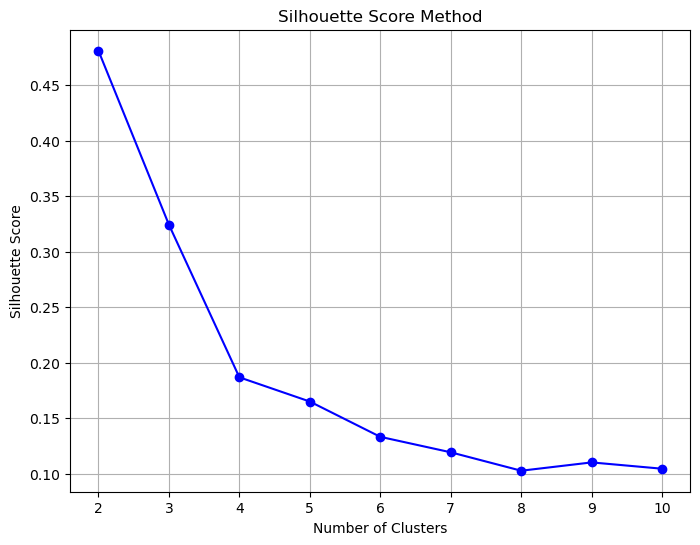

In [24]:
# Plot the silhouette score method
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')  # Add marker and line style
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

# Add grid lines
plt.grid(True)

plt.show()

**Through the silhouette scores method we see that k=2 gives the highest silhouette_scores value, hence we can take k=2.**

In [28]:
# Showing that best k-value is 2
silhouette_scores = {}

# Testing different values of K
for k in range(2, 11):
    # Fitting KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    labels = kmeans.labels_
    silhouette_scores[k] = silhouette_score(X, labels)

# Finding the K value with the highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_k]

print(f"Best K value: {best_k}")
print(f"Silhouette Score for best K value: {best_score}")

Best K value: 2
Silhouette Score for best K value: 0.48107627299425504


In [69]:
# Number of unique classes in the cluster labels
num_classes = len(set(labels))

print("Number of unique classes:", num_classes)

Number of unique classes: 2


# K-Means Clustering

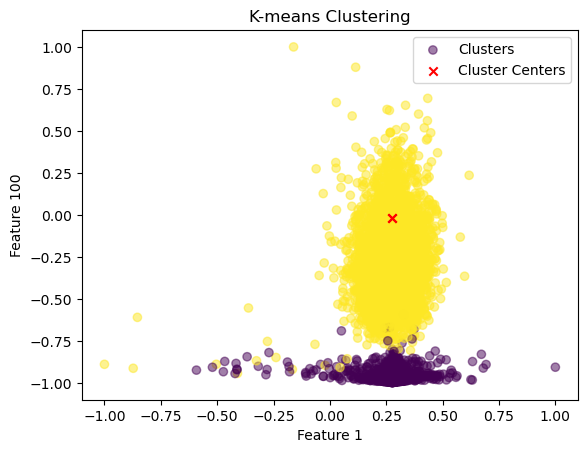

In [39]:
# Apply k-means clustering for k = 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the original dataset
plt.scatter(X.iloc[:, 0], X.iloc[:, 100], c=labels, cmap='viridis', marker='o', alpha=0.5, label='Clusters')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 100')
plt.title('K-means Clustering')
plt.legend()
plt.show()

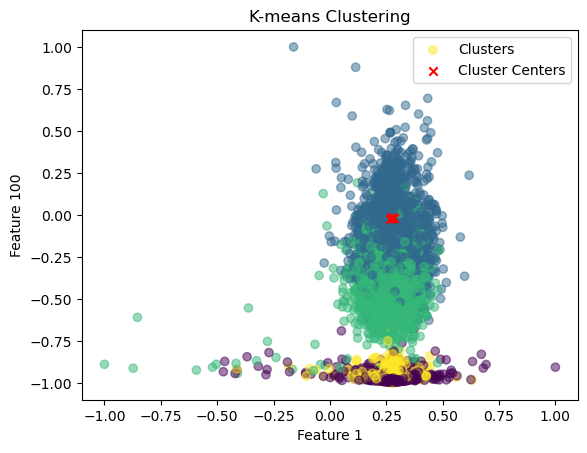

In [38]:
# Apply k-means clustering for k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the original dataset
plt.scatter(X.iloc[:, 0], X.iloc[:, 100], c=labels, cmap='viridis', marker='o', alpha=0.5, label='Clusters')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 100')
plt.title('K-means Clustering')
plt.legend()
plt.show()

Hence we get clusters for k=2 and k=4, and the plot of the 1st and 100th features of the dataset can we seen in teh plots above.

These help us visualize the clusters.

# Agglomerative Clustering

In [58]:
# Apply agglomerative clustering for n_clusters = 2

# Performing it only on a part of the data as there are 10,299 instances
X_agg = X.iloc[:3000,:]

# Initializing an empty dictionary to store silhouette scores for different K values
silhouette_scores_agg = {}

# Testing different values of K
for k in range(2, 11):
    # Fitting Agglomerative clustering model
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(X_agg)
    
    labels_agg = agglomerative.labels_
    silhouette_scores_agg[k] = silhouette_score(X_agg, labels_agg)

# Finding the K value with the highest silhouette score
best_k_agg = max(silhouette_scores_agg, key=silhouette_scores_agg.get)
best_score_agg = silhouette_scores_agg[best_k_agg]

print(f"Best K value for Agglomerative clustering: {best_k_agg}")
print(f"Silhouette Score for best K value: {best_score_agg}")

Best K value for Agglomerative clustering: 2
Silhouette Score for best K value: 0.4795980975509733


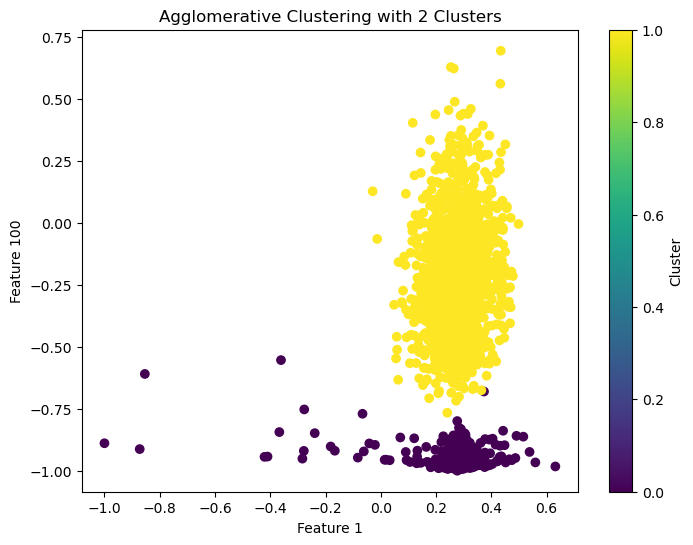

In [68]:
# Plotting the Clusters

n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(X_agg)
plt.figure(figsize=(8, 6))
plt.scatter(X_agg.iloc[:, 0], X_agg.iloc[:, 100], c=clusters, cmap='viridis')
plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 100')
plt.colorbar(label='Cluster')
plt.show()

In [67]:
# Number of unique classes in the cluster labels
num_classes = len(set(labels_agg))

print("Number of unique classes:", num_classes)

Number of unique classes: 10


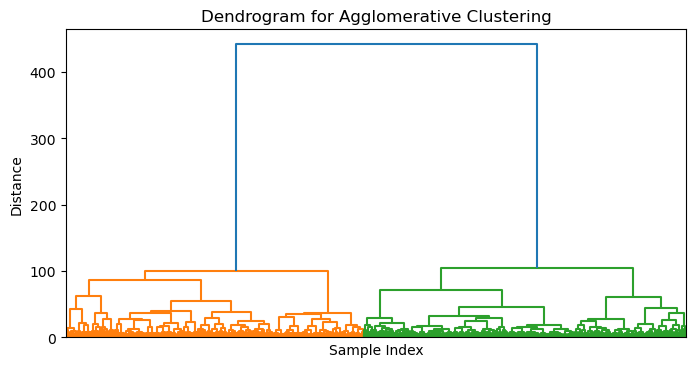

In [59]:
# Plot the dendrogram

# Calculating the linkage matrix
Z = linkage(X_agg, method='ward', optimal_ordering=True)
# Plotting the dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.xticks([])
plt.ylabel('Distance')
plt.show()

**Therefore this plot shows us how the datapoints are clustered into 2 final clusters for first 3000 instances of the data.**

# Evaluation of Performance

## Using Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.48107627299425504
For n_clusters = 4 The average silhouette_score is : 0.18691568989019267
For n_clusters = 6 The average silhouette_score is : 0.13287430134582526


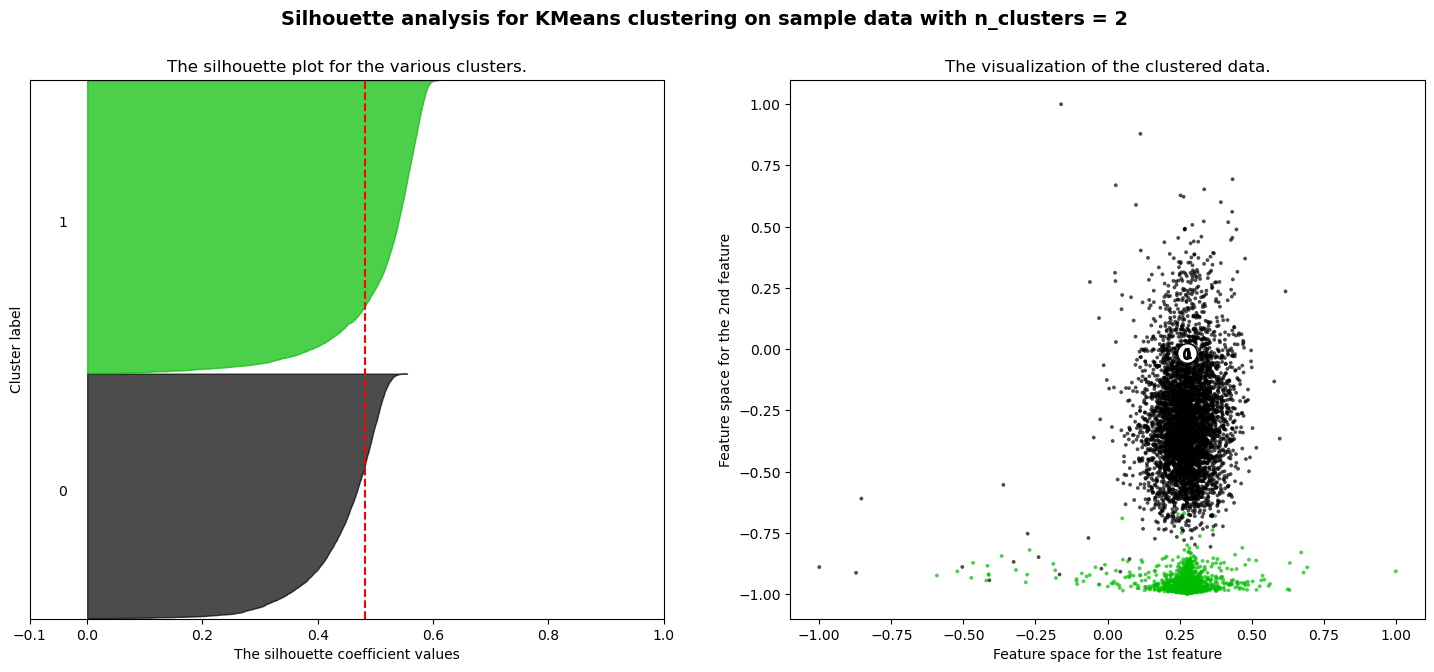

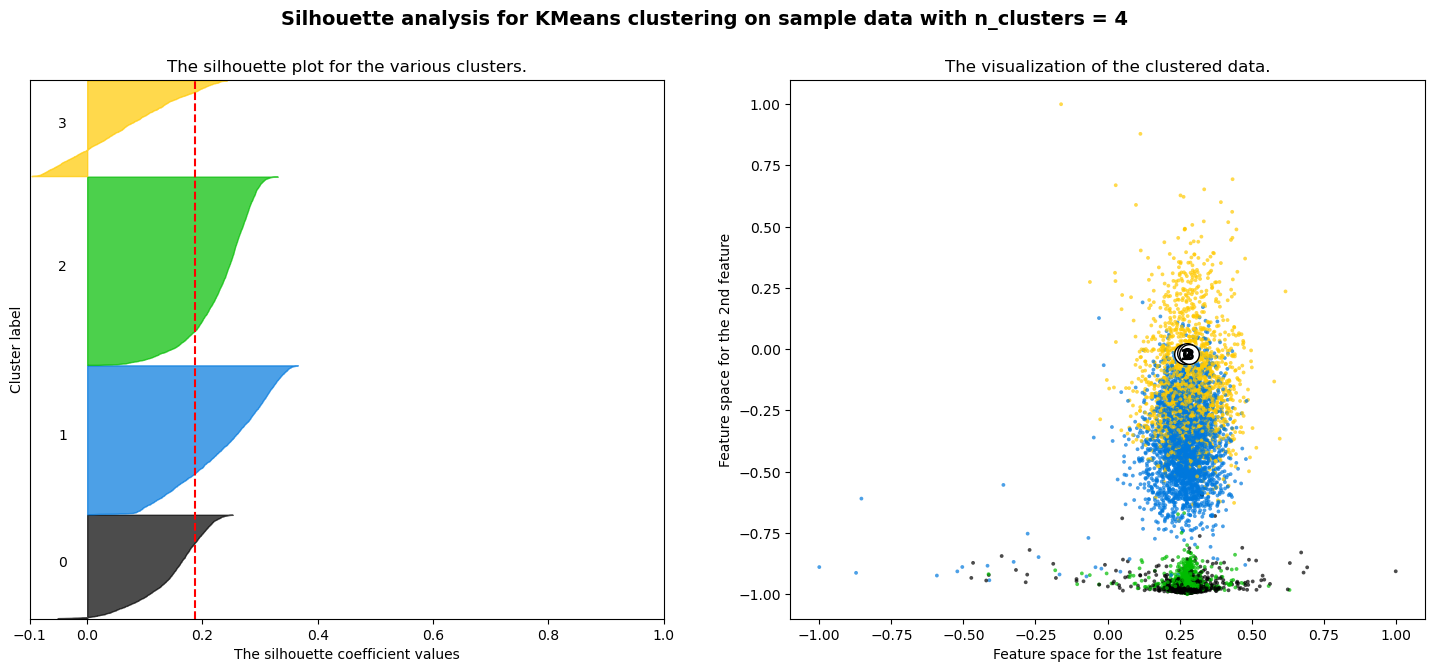

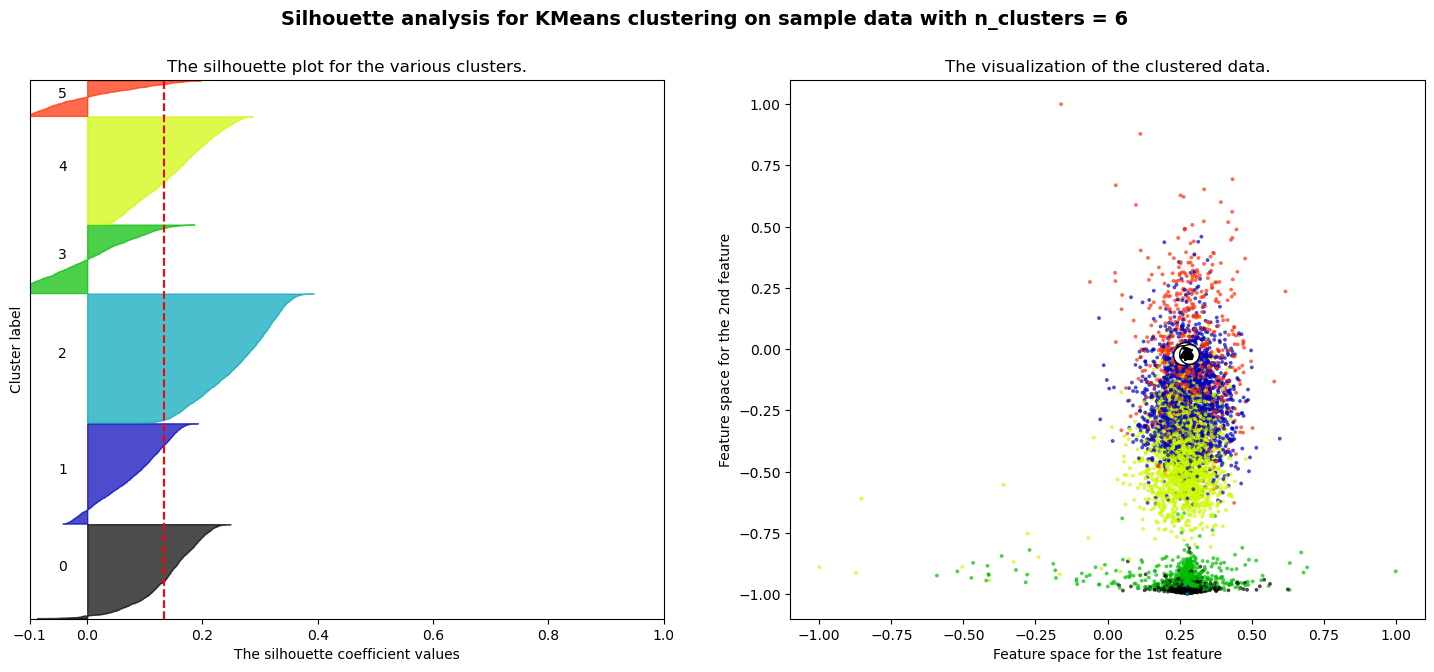

In [66]:
import matplotlib.cm as cm

range_n_clusters = [2, 4, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 100], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Inferences

We see that the silhouette score is the maximum for k=2.
**Hence we conclude that there are 2 clusters in the dataset.**

There are **6 classes** in the dataset but according to the Agglomerative Clustering, there are **10 classes**, whereas according to K-means clustering there are **2 classes**. This might be because the data might have a complex structure that results in the clustering algorithm identifying more clusters than expected. This could be due to **overlapping classes, noisy data, or non-linear relationships between features**. In our case it could be because of overlapping classes, as can be seen from the plots.

**Therefore Agglomerative gave us a closer prediction of the number of classes in the clusters formed.**